In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

Loading in Healthy Lifestyle Cities 2021 Dataset

This dataset was found on Kaggle. It examines the healthy lifestyle metrics of 44 cities in 2021.




In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
# size of dataset
print(df.shape)

(374, 13)


In [4]:
for c in df.columns:
  print(f"{c}: {type(df[c][3])}")

Person ID: <class 'numpy.int64'>
Gender: <class 'str'>
Age: <class 'numpy.int64'>
Occupation: <class 'str'>
Sleep Duration: <class 'numpy.float64'>
Quality of Sleep: <class 'numpy.int64'>
Physical Activity Level: <class 'numpy.int64'>
Stress Level: <class 'numpy.int64'>
BMI Category: <class 'str'>
Blood Pressure: <class 'str'>
Heart Rate: <class 'numpy.int64'>
Daily Steps: <class 'numpy.int64'>
Sleep Disorder: <class 'str'>


In [5]:
missing_values = df.isnull().sum()
missing_values

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
def clean_value(value):
    cleaned_value = re.sub(r'\s+|[^a-zA-Z0-9]', '', str(value))
    return cleaned_value

df.rename(mapper=clean_value, axis=1, inplace=True)
df

,PersonID,Gender,Age,Occupation,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,BloodPressure,HeartRate,DailySteps,SleepDisorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Simple Linear Regression

Dependent Variable (DV)- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

Independent Variable (IV)- Daily Steps: The number of steps the person takes per day.

In [7]:
X1 = sm.add_constant(df['DailySteps'])  # Adds a constant term to the predictor
model1 = sm.OLS(df['StressLevel'], X1)
results1 = model1.fit()

In [8]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            StressLevel   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     13.45
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           0.000280
Time:                        05:44:31   Log-Likelihood:                -738.04
No. Observations:                 374   AIC:                             1480.
Df Residuals:                     372   BIC:                             1488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9882      0.391     10.190      0.0

In [9]:
residuals1 = results1.resid
fitted1 = results1.fittedvalues

Insights: The R-squared value for the regression model is 0.035 and the adjusted R-squared value is 0.032. The R-squared value is very close to 0. This shows that the independent variable of daily steps is not a strong factor/predictor for stress levels. The R-squared value also shows that only 3.5% of the variance in Stress Levels can be explained by the variation in Daily Steps. Therefore, the relationship between daily steps and stress levels is very weak. This model is not a strong predictor of stress levels. I was surprised by this result because we always hear how walking is beneficial and can reduce stress. However, I also noted that the stress levels in this dataset were not collected after someone went on a walk. Perhaps the results would be different if a person was asked about their stress levels after going on a walk.  

# Checking Assumptions

In [10]:
# Assess the linearity of the relationship
stat, p_value = linear_rainbow(results1)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=2.3999509603050027, p-value=2.2345659924134212e-09


The Rainbow Test gives a p-value of 2.235e-09 which is less than the significance level. This suggests that there is strong evidence against linear assumption.

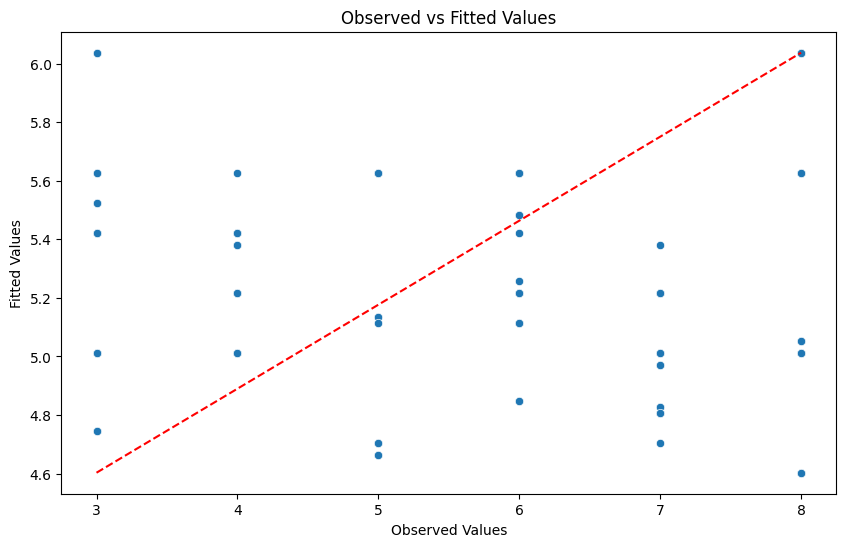

In [11]:
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['StressLevel'], y=fitted1)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['StressLevel']), max(df['StressLevel'])], [min(fitted1), max(fitted1)], color='red', linestyle='--')
plt.show()

In [12]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals1)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9235842823982239, p-value=7.039474255246536e-13


Insights: The Shapiro Wilk Test gave a p-value of 7.04e-13, which is lower than 0.05. This shows that the residuals do not have a normal distribution. The data deviates significantly from a normal distribution.

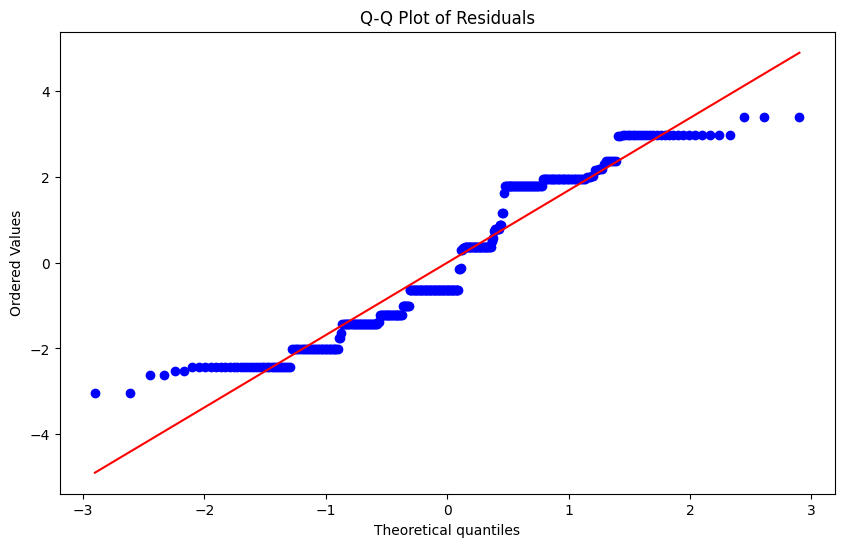

In [14]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals1, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In this Quantile-Quantile Plot, the points deviate from a straight line. This shows that the residuals do not follow the theorectical distribution.

In [15]:
# Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals1, results1.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.5124943747999127, p-value=0.0025538645161631286


The Goldfeld-Quandt Test gives a p-value of 0.00255 which is less than the significance level of 0.05. This shows that there is a significant effect on the homogeneity of variance. There is a strong indication that the variance of the residuals differs significantly across the variables.

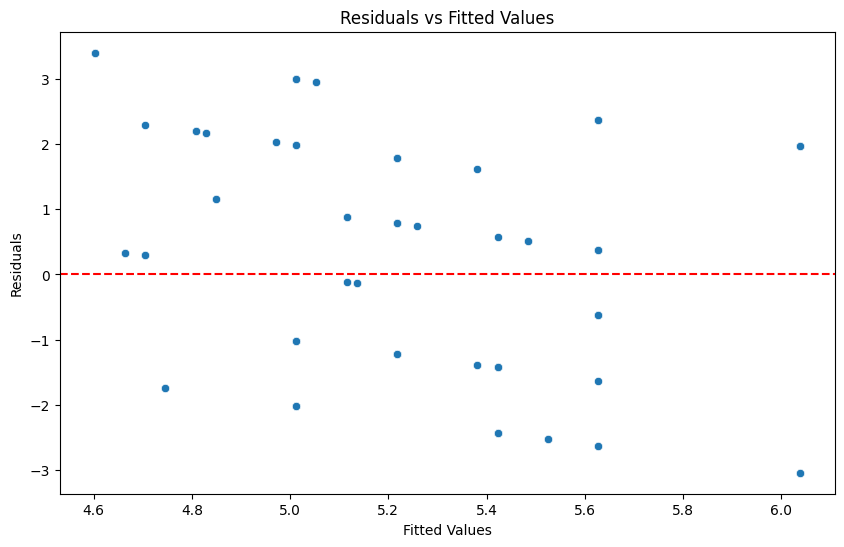

In [16]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted1, y=residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Multiple Linear Regression

Variables-
Independent Variables: Age, Sleep Duration (SleepDuration), Physical Activity Level (PhysicalActivityLevel), Stress Level (StressLevel), Heart Rate (HeartRate), Daily Steps (DailySteps)

Dependent Variable: Quality of Sleep (QualityofSleep)

In [20]:
X = df[['Age', 'SleepDuration', 'PhysicalActivityLevel', 'StressLevel', 'HeartRate', 'DailySteps']]
X = sm.add_constant(X)
y = df['QualityofSleep']

model_1 = sm.OLS(y, X)

results_1 = model_1.fit()

print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:         QualityofSleep   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     611.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.14e-187
Time:                        06:01:45   Log-Likelihood:                -149.01
No. Observations:                 374   AIC:                             312.0
Df Residuals:                     367   BIC:                             339.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.28

The R-squared value for this multiple regression model is 0.909. The adjusted R-squared value is 0.908. This shows a strong relationship between the independent variables and the dependent variable. There is a good portion of variation in the dependent variable of 'quality of sleep' that can be predicted based on the independent variables. In other words, 90.9% variability is observed in the dependent variable.

In [21]:
residuals_1 = results_1.resid
fitted_1 = results_1.fittedvalues

In [22]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
                Variable          VIF
0                  const  1351.852988
1                    Age     1.269450
2          SleepDuration     3.311562
3  PhysicalActivityLevel     5.005658
4            StressLevel     5.542575
5              HeartRate     3.313793
6             DailySteps     4.907447


Variance Inflation Factor is used for detecting multicollinearity. As seen above, the variables of Age, Sleep Duration, Heart Rate, and Daily Steps are less than 5. This indicates that there is little multicollinearity associated between the independent variables. For Physical Activity Level and Stress Level, the VIF is 5.006 and 5.5426 respectively. This indicates a moderate correlation. All variables are less than 10.

In [23]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results_1)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=4.835753261192087, p-value=2.0794243593440635e-24


The Rainbow Test gives a p-value of 2.0794e-24 which is less than the significance level of 0.05. This suggests that there is strong evidence against linear assumption. This linear regression model cannot be a reasonable fit for the data.

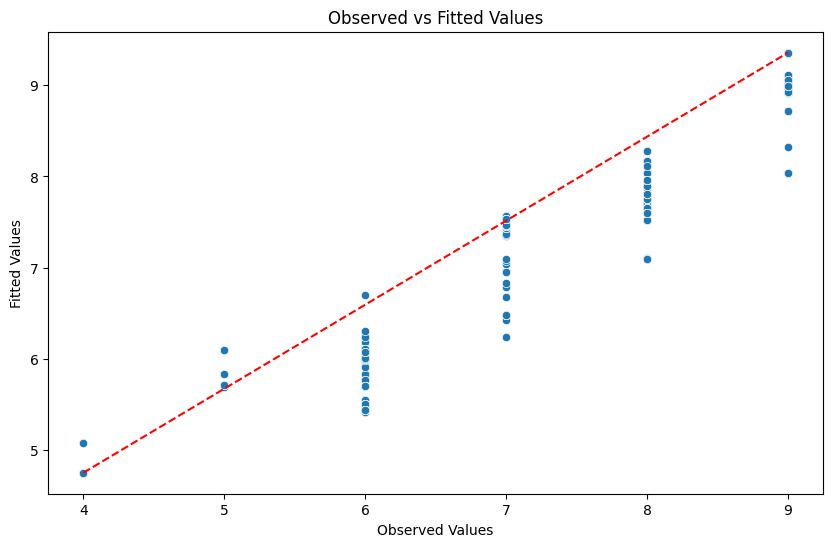

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['QualityofSleep'], y=fitted_1)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['QualityofSleep']), max(df['QualityofSleep'])], [min(fitted_1), max(fitted_1)], color='red', linestyle='--')
plt.show()

In [26]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals_1)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9875890612602234, p-value=0.002786871511489153


The Shapiro Wilk Test gave a p-value of 0.002787, which is less than 0.05. This shows that the residuals do not have a normal distribution. The data deviates from a normal distribution.

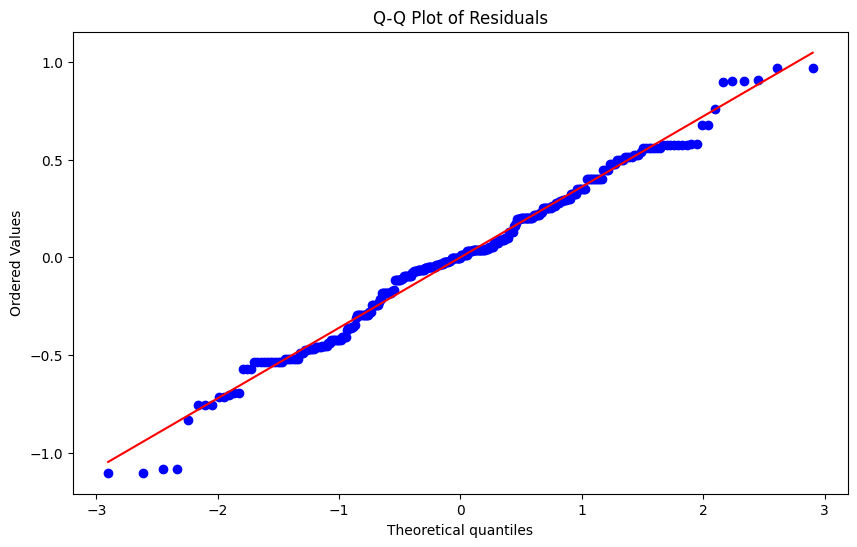

In [27]:
# Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals_1, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

 In this QQ plot, the points deviate from the straight line. This shows that the residuals do not follow the theorectical distribution.

In [28]:
gq_test = het_goldfeldquandt(residuals_1, results_1.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.23769840406144746, p-value=0.9999999999999999


The Goldfeld-Quandt test gave a p-value of 0.999999 which is greater than the significance level of 0.05. This demonstrates that heteroscedasticity is not present in the variances of the residuals.

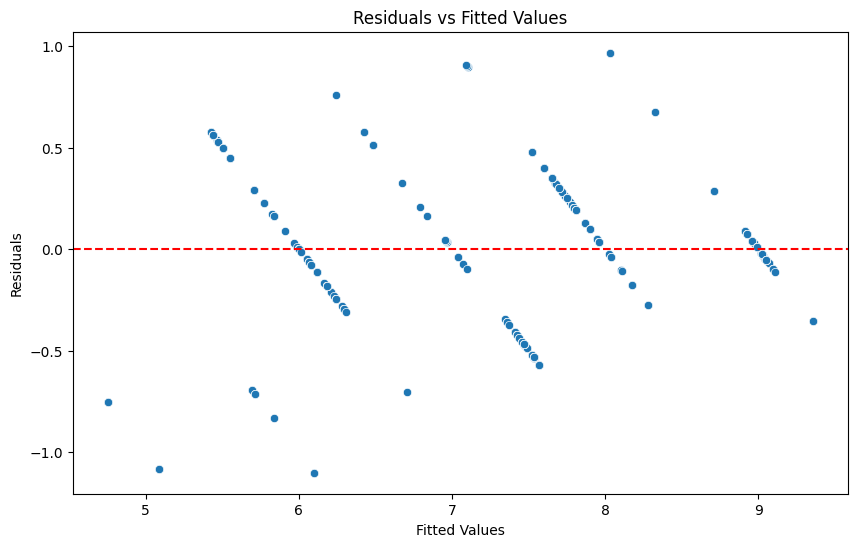

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_1, y=residuals_1)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()